## Questionário 32 (Q32)

Orientações: 

- Registre suas respostas no questionário de mesmo nome no SIGAA.
- O tempo de registro das respostas no questionário será de 10 minutos. Portanto, resolva primeiro as questões e depois registre-as.
- Haverá apenas 1 (uma) tentativa de resposta.
- Submeta seu arquivo-fonte (utilizado para resolver as questões) em formato _.ipynb_ pelo SIGAA anexando-o à Tarefa denominada "Envio de arquivo" correspondente ao questionário.

*Nota:* o arquivo-fonte será utilizado apenas como prova de execução da tarefa. Nenhuma avaliação será feita quanto ao estilo de programação.

<hr>

**Questão 1.** Marque a alternativa cujas funções são as utilizadas para imprimir as 4 primeiras e as 6 últimas linhas, respectivamente, de um _DataFrame_ `d`, tal que  `len(d) = 20`.

A. `df.head(6)`, `df.tail(4)`

B. `df.head(-6)`, `df.tail(4)`

**C**. `df.head(-16)`, `df.tail(6)`

D. `df.tail(-6)`, `df.tail(4)`

<div class="alert alert-block alert-success">
<b>Resposta:</b> C. df.head(-16), df.tail(6)
</div>

In [10]:
import pandas as pd
lista = [x for x in range(20)]
df = pd.DataFrame(lista)
df.head(4)

,0
0,0
1,1
2,2
3,3


In [11]:
df.head(-16)

,0
0,0
1,1
2,2
3,3


In [12]:
df.tail(6)

,0
14,14
15,15
16,16
17,17
18,18
19,19


<hr>

**Questão 2** No dia 01/08/2021, três veículos saíram de João Pessoa - PB (JPA) com destino a três cidades com distâncias (em quilômetros) e durações de viagem (em horas) em relação à origem dadas pelo quadro abaixo. 

|   Veículo | Cidade    |   Distância de JPA (km) | Duração (h) |
|--------:|:----------|-----------------:|:-------------|
|  VW Gol | Bahia     |              848 | 7,5          |
|  BMW Z4 | Fortaleza |              728 | 10           |
|Chery QQ | Sergipe   |              640 | 9,5          |

Tendo chegado ao destino, verificou-se por meio de um sistema de monitoramento que às 13:45h desse mesmo dia, todos os veículos haviam registrado no velocímetro uma velocidade igual à velocidade média calculada para o percurso. Entretanto, a partir desse instante, o sistema mostrou que os veículos haviam acelerado de tal forma que, às 13:47h, a velocidade média havia aumentado em 12% de seu valor. 

Construa um _DataFrame_ `df` que calcule as velocidades e acelerações dos veículos – em unidades de metro e segundo – nos instantes de interesse e defina as variáveis a seguir:

- `a = df.loc['VW Gol']['Vel. inicial (m/s)']`

- `b = df.loc['BMW Z4']['Vel. final (m/s)']`

- `c = df.loc['Chery QQ']['Aceleração (m/s2)']`

Então, assinale a alternativa que corresponde à tupla `(a,b,c)`, com aproximação de duas casas decimais. 

A. (10.12, 20.20, 0.01)

B. (18.71, 20.96, 0.03)

C. (20.22, 22.65, 0.02)

**D. (31.41, 22.65, 0.02)**


<div class="alert alert-block alert-success">
<b>Resposta:</b> D. (31.41, 22.65, 0.02)
</div>

In [157]:
df = pd.DataFrame({"Veículo" : ["VW Gol", "BMW Z4", "Chery QQ"], "Cidade": ["Bahia", "Fortaleza", "Sergipe"],
                  "Distância de JPA (km)": [848, 728, 640], "Duração (h)": [7.5, 10, 9.5]})
df = df.set_index("Veículo")
vm_ms = []

'''
A velocidade média pode ser calculado por ΔS/Δt (variação do espaço percorrido em função da variação do tempo)
A aceleração média pode ser calculada através de ΔV/Δt (variação da velocidade em função da variação do tempo)
'''


for dist,tempo in zip(df['Distância de JPA (km)'], df['Duração (h)']):
    vel_media = round((dist/tempo), 2)
    vm_ms.append(round((vel_media/3.6),2)) #Velocidade média em m/s

df["Vel. inicial (m/s)"] = vm_ms

instante_2 = []
for velocidade in vm_ms:
    instante_2.append(round(velocidade*1.12, 2))
    
df["Vel. final (m/s)"] = instante_2


In [158]:
df

,Cidade,Distância de JPA (km),Duração (h),Vel. inicial (m/s),Vel. final (m/s)
Veículo,,,,,
VW Gol,Bahia,848,7.5,31.41,35.18
BMW Z4,Fortaleza,728,10.0,20.22,22.65
Chery QQ,Sergipe,640,9.5,18.71,20.96


In [159]:
aceleracao = []
for vel_i, vel_f in zip(df["Vel. inicial (m/s)"], df["Vel. final (m/s)"]):
    aceleracao.append(round((vel_f-vel_i)/120, 2))
df["Aceleração média (m/s²)"] = aceleracao

In [160]:
df

,Cidade,Distância de JPA (km),Duração (h),Vel. inicial (m/s),Vel. final (m/s),Aceleração média (m/s²)
Veículo,,,,,,
VW Gol,Bahia,848,7.5,31.41,35.18,0.03
BMW Z4,Fortaleza,728,10.0,20.22,22.65,0.02
Chery QQ,Sergipe,640,9.5,18.71,20.96,0.02


<hr>

**Questão 3.** O _dataset_ encontrado no arquivo [flights.csv](https://github.com/gcpeixoto/ICD/blob/main/database/flights.csv?raw=true) (_Box & Jenkins arline data_) registra a quantidade de passageiros transportados por uma companhia aérea entre 1949 e 1960.

Utilizando agrupamentos, determine: 

- `y`: o ano em que o maior número de passageiros foi transportado;
- `p`: o total de passageiros transportados no ano `y`;
- `m1, m2, m3`: os 3 meses que, na média, transportaram os maiores números de passageiros ao longo desses anos (TOP 3);

Assinale a alternativa que corresponde aos valores corretos dessas variáveis na seguinte ordem: `y`, `p`, `(m1,m2,m3)`.


A. 1957, 4421, (Jul, Ago, Set)

**B**. 1960, 5714, (Jul, Ago, Jun)

C. 1960, 5714, (Nov, Fev, Jan)

D. 1951, 2042, (Ago, Set, Out)

<div class="alert alert-block alert-success">
<b>Resposta:</b> B. 1960, 5714, (Jul, Ago, Jun)
</div>

In [76]:
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/gcpeixoto/ICD/main/database/flights.csv")
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [114]:
#Para retornar o ano com maior número de passageiros basta agrupar os dados por 'year'
#e retornar a soma de cada um desses anos
soma_por_ano = df.groupby(['year']).sum()
#Para retornar o índice com o valor máximo usa-se idxmax()
print(f"Ano com o maior número de passageiros: {soma_por_ano.idxmax()[0]}")
#Para retornar o valor máximo usa-se max()
print(f"Quantidade de passageiros: {soma_por_ano.max()[0]}")

Ano com o maior número de passageiros: 1960
Quantidade de passageiros: 5714


In [133]:
#Utilizei apenas as colunas passengers e month para evitar que seja feito
#o cálculo da média da coluna years


                           #colunas        #agrupar por mês   #tirar média e arrendondar
media_por_mes = df[['passengers','month']].groupby(['month']).mean().round(decimals=2)

media_por_mes.sort_values(by=['passengers'], ascending=False).head(3)

Os meses com a maior média de passageiros são:


,passengers
month,
July,351.33
August,351.08
June,311.67


In [128]:
df[['passengers','month']]

,passengers,month
0,112,January
1,118,February
2,132,March
3,129,April
4,121,May
...,...,...
139,606,August
140,508,September
141,461,October
142,390,November


<AxesSubplot:xlabel='month', ylabel='year'>

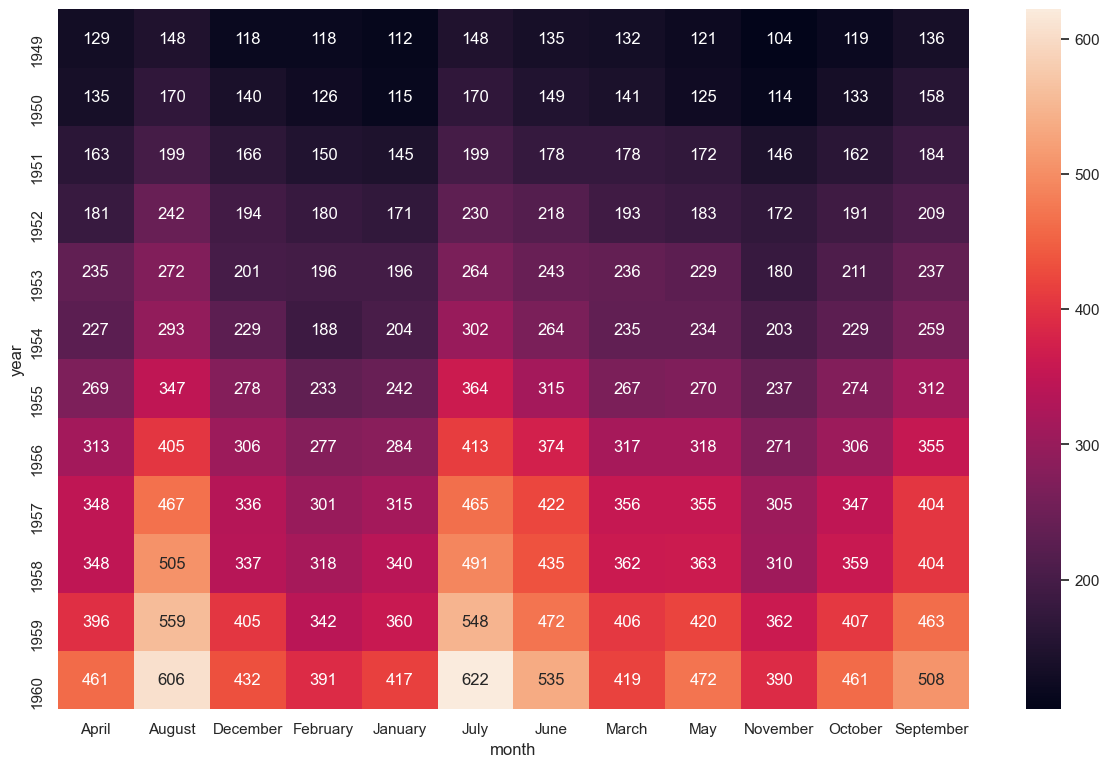

In [91]:
sns.set(rc={"figure.dpi":100, 'savefig.dpi':150})
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.heatmap(df.pivot("year","month","passengers"), annot=True, fmt='d')